In [ ]:
'''
article: https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651
'''

In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
import pandas as pd 
import seaborn as sns 
from pylab import rcParams
import matplotlib.pyplot as plt 
from matplotlib import rc 

%matplotlib inline 
%config InLineBackend.figure_format = 'retina'

sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale = 0.5, size = len(time))

In [6]:
df = pd.DataFrame(dict(sine=sin), index = time, columns = ['sine'])
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size: len(df)]
print(len(train), len(test))

800 200


In [7]:
def create_dataset(X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [8]:
time_steps = 10

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


In [9]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units = 128,
    input_shape = (X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units = 1))
model.compile(
    loss = 'mean_squared_error',
    optimizer = keras.optimizers.Adam(.001)
)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs = 30,
    batch_size = 16,
    validation_split = 0.1,
    verbose = 1,
    shuffle = False
)

Epoch 1/30
45/45 [==============================] - 3s 71ms/step - loss: 0.5384 - val_loss: 0.3740
Epoch 2/30
45/45 [==============================] - 0s 11ms/step - loss: 0.3193 - val_loss: 0.3310
Epoch 3/30
45/45 [==============================] - 0s 10ms/step - loss: 0.3034 - val_loss: 0.3254
Epoch 4/30
45/45 [==============================] - 0s 11ms/step - loss: 0.3026 - val_loss: 0.3217
Epoch 5/30
45/45 [==============================] - 0s 11ms/step - loss: 0.3014 - val_loss: 0.3191
Epoch 6/30
45/45 [==============================] - 1s 11ms/step - loss: 0.3006 - val_loss: 0.3171
Epoch 7/30
45/45 [==============================] - 0s 10ms/step - loss: 0.2999 - val_loss: 0.3154
Epoch 8/30
45/45 [==============================] - 1s 11ms/step - loss: 0.2993 - val_loss: 0.3140
Epoch 9/30
45/45 [==============================] - 0s 10ms/step - loss: 0.2988 - val_loss: 0.3126
Epoch 10/30
45/45 [==============================] - 1s 11ms/step - loss: 0.2982 - val_loss: 0.3113
Epoch 11/

In [11]:
y_pred = model.predict(X_test)

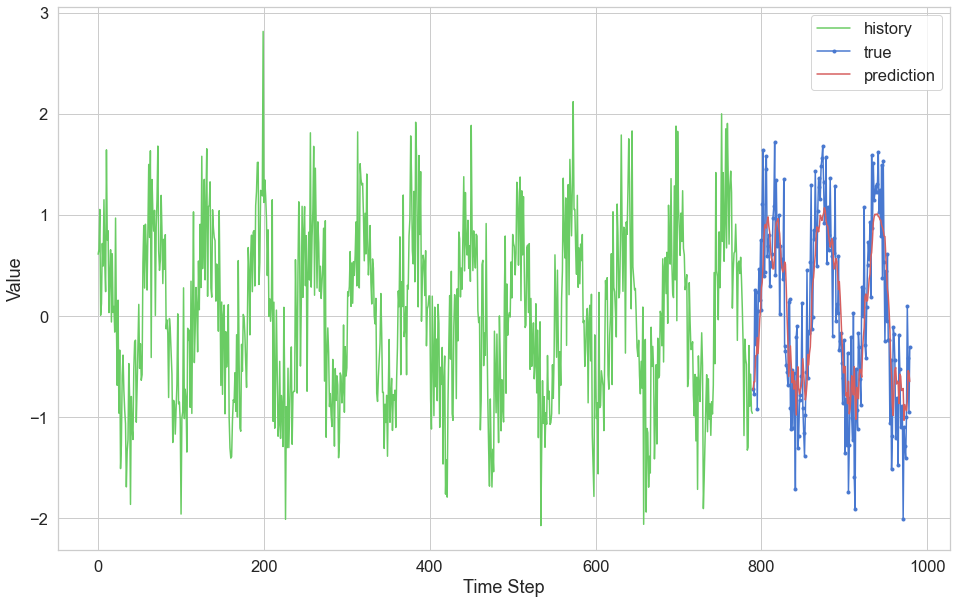

In [16]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label = 'history')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker = '.', label = 'true')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label = 'prediction')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

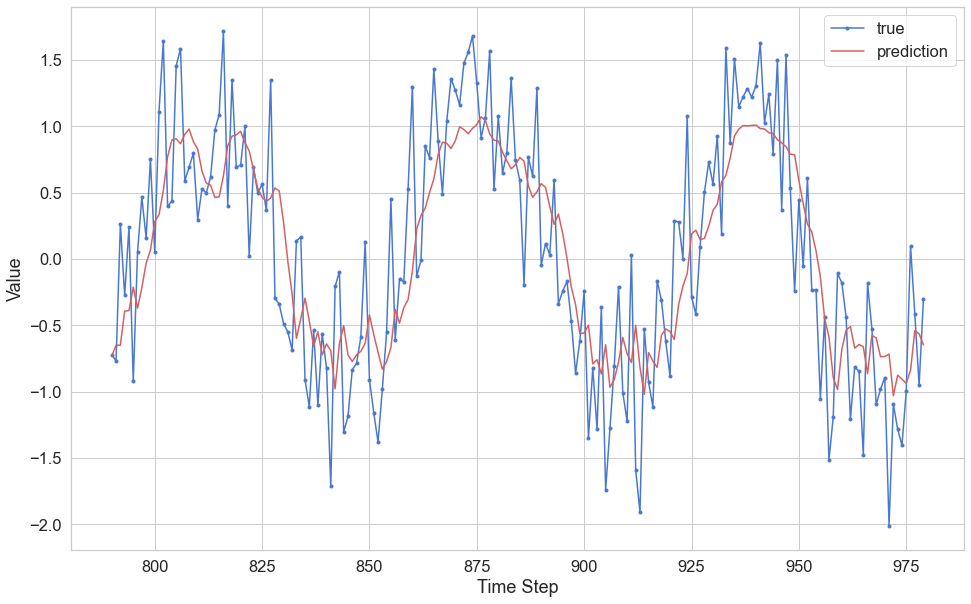

In [18]:
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker = '.', label = 'true')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label = 'prediction')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()